# Analyzing Film Trends for Microsoft's New Movie Studio
**Authors:** Fanice Andayi
***

![Video content.jpg](<images and graphs/Video content.jpg>)


# A) INTRODUCTION
In an evolving landscape where original content reigns supreme, understanding the current cinematic trends that drive box office success is paramount for Microsoft's foray into the movie industry. This analysis delves into the diverse genres and themes that have proven their commercial prowess, offering actionable insights to guide the strategic direction of Microsoft's new movie studio. By examining the recent box office hits, audience preferences, and emerging patterns in storytelling, this exploration aims to illuminate the potential pathways for Microsoft to carve its niche and thrive in this competitive arena.
# B) PROBLEM STATEMENT
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
# C) MAIN OBJECTIVE
The main objective is to identify prevalent box office trends and audience preferences across genres, providing strategic direction for Microsoft's new movie studio to create compelling, commercially successful films that resonate with audiences and differentiate the brand in the market.
# D) SPECIFIC OBJECTIVES
Certainly! Here are specific objectives aligned with those aspects:

1. **Top Studio Analysis:** Evaluate the leading studios .

2. **Genre Performance Assessment:** Analyze the performance of various genres ,identifying genres with consistent success and potential for growth.

3. **Budget-Revenue Dynamics:** Investigate the correlation between film budgets and revenue aiming to uncover optimal budgetary ranges that maximize profitability without compromise.
# E) NOTEBOOK STRUCTURE
1.Overview

2.Business Understanding 

3.Data Understanding

4.Data preparation/Cleaning

5.Data Analysis and Evaluation - Visualizations

6.Conclusion - Recommendations,Limitations,Next Steps.


![Analysis photo.jpg](<images and graphs/Analysis photo.jpg>)

## 1. Overview


This project aims to guide Microsoft's foray into the film industry by analyzing current box office trends to determine the most successful film genres. Leveraging data from box office performances, audience demographics, and critical reception, the study assesses the top-performing genres in recent years, emphasizing revenue generation, audience engagement, and market demands. Employing a mix of statistical analysis and industry research, the study unveils films that have consistently dominated the box office, garnering substantial profits and wide audience appeal. Moreover, it highlights the significance of strong storytelling, visual effects, and engaging characters in driving success within these genres. The findings recommend a strategic focus on certain genres for Microsoft's new movie studio, coupled with a dedication to high revenues, leading studios, and immersive visual experiences to maximize market penetration and profitability.

## 2. Business Understanding
The business problem at hand is Microsoft's venture into the film industry without prior expertise in movie production. The main pain point is the lack of understanding about which film genres are most successful at the box office. To address this, the analysis aims to answer key data questions:

1. **Which studio movies are most watched ?**
   - Analyzing the studios performing well enables us to better what they do and even provide a chance for collaboration regarding creating film content.

2. **Which film genres have consistently performed well at the box office in recent years?**
   - Understanding the top-performing genres provides critical insights into market trends and audience preferences, guiding Microsoft's studio toward potentially lucrative areas of production.

2. **What is the relationship between production_budgets and gross(earnings)?**
   - Analyzing revenue trends in relation to the gross(earnings) helps quantify the financial potential and profitability of specific film types, enabling informed decisions on investment allocation.



To understand the datasets we are working with we first explore our data by loading the datasets.


In [13]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sqlite3


In [14]:
#Here you can run your code to explore data

In [15]:


# Connect to the SQLite database
conn = sqlite3.connect('data/im.db')

# Create a cursor object
cur = conn.cursor()

# Get the list of all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Print all tables
tables = cur.fetchall()
for table in tables:
    print(table)

# Close the connection
conn.close()

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


In [16]:

# Connect to the SQLite database
conn = sqlite3.connect('data/im.db')
# Create a cursor object
cur = conn.cursor()
# Get the list of all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
# Print all tables
print(cur.fetchall())
# Close the connection
conn.close()

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [17]:


db_path = 'data/im.db'  # Path to the extracted SQLite database

# Connect to the SQLite database
conn = sqlite3.connect(db_path)


# Read movie_basics table
movie_basics_query = "SELECT * FROM movie_basics LIMIT 10"  # Fetching first 10 rows 
movie_basics_data = pd.read_sql_query(movie_basics_query, conn)
print("Movie Basics Data:")
print(movie_basics_data.head())

# Read movie_ratings table
movie_ratings_query = "SELECT * FROM movie_ratings LIMIT 10"  # Fetching first 10 rows 
movie_ratings_data = pd.read_sql_query(movie_ratings_query, conn)
print("\nMovie Ratings Data:")
print(movie_ratings_data.head())

# Close the database connection
conn.close()


Movie Basics Data:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  

Movie Ratings Data:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt10437

In [18]:
#loading the 1st dataset
bom_movie_gross= 'data/bom.movie_gross.csv'
# Load the CSV file into a Pandas DataFrame
bom_movie_gross_data = pd.read_csv(bom_movie_gross)
# Display the first few rows of the dataset to ensure it's loaded correctly
print(bom_movie_gross_data.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [19]:


# Loading the 2nd dataset
tmdb_movies = 'data/tmdb.movies.csv'

# Load the CSV file into a Pandas DataFrame
tmdb_movies_data = pd.read_csv(tmdb_movies)

# Display the first few rows of the dataset to ensure it's loaded correctly
print(tmdb_movies_data.head())


   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

In [20]:
#loading the 3rd dataset
tn_movie_budgets= 'data/tn.movie_budgets.csv'
# Load the CSV file into a Pandas DataFrame
tn_movie_budgets_data = pd.read_csv(tn_movie_budgets)
# Display the first few rows of the dataset to ensure it's loaded correctly
print(tn_movie_budgets_data.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


In [21]:
#loading for a tsv file

# Load Rotten Tomatoes movie info TSV
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')

# Display the first few rows of the loaded data
print(rt_movie_info.head())



   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

In [22]:
#loading the reviews tsv file
with open('data/rt.reviews.tsv', 'rt',encoding='latin -1') as f:
    rt_reviews = pd.read_csv(f, sep='\t')

print("\nRotten Tomatoes reviews:")
print(rt_reviews.head())


Rotten Tomatoes reviews:
   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  


## 3. Data Understanding
The data utilized for this project is sourced from comprehensive databases such as the box office movies,the numbers and market research on film performances. These datasets are instrumental in addressing the data analysis questions .

1. **Data Origin and Relevance to Analysis Questions:**
   - The data primarily originate from reputable sources tracking box office performances, film genres, revenues, audience demographics, and critical reception. These sources offer insights into film success metrics relevant to understanding genre performance.

2. **Representation and Variables:**
   - The dataset encompasses a broad range of films released in recent years, including variables such as film title, release date, genre categorization, box office revenue, production budget, audience demographics (age, gender, location), critical ratings, and perhaps viewer ratings.
  
3. **Target Variable:**
   - The primary target variables are box office revenue, genre categorization, and audience demographics. Understanding how these variables interact and influence each other is crucial in shaping the studio's strategic decisions.

4. **Properties of Variables:**
   - Box office revenue and production budget typically represent continuous numerical values.
   - Genre categorization is categorical, allowing for classification and comparison of different film types.
   - Audience demographics may include categorical and numerical values, providing insights into the composition and preferences of the movie-going audience.

The dataset's richness in film-related information allows for comprehensive analysis and exploration of correlations between genres, revenues, audience characteristics, and critical reception, serving as a robust foundation for deriving actionable insights to guide Microsoft's movie studio endeavors.
We are going to be checking the data for the following:

a.Determine the number of records 

b.Preview top and bottom of our dataset

c.Check whether each column has an appropriate data type

# a)Determining the number of records 
We will be using 4 datasets for our analysis :
- Box office movies
- Movie basics
- Movie ratings
- The mumbers movie budgets

In [23]:
#for the box office movies

num_records = bom_movie_gross_data.shape[0]
print("Number of records:", num_records)


Number of records: 3387


In [24]:
#for the movie basics

num_records = movie_basics_data.shape[0]
print("Number of records:", num_records)


Number of records: 10


In [25]:
# for the movie ratings

num_records = movie_ratings_data.shape[0]
print("Number of records:", num_records)


Number of records: 10


In [26]:
# for the numbers movie budgets

num_records = tn_movie_budgets_data.shape[0]
print("Number of records:", num_records)


Number of records: 5782


# b).Preview top and bottom  rows of our dataset
Previewing for all our datasets




In [27]:
# Preview the bottom of the dataset
bottom_rows = bom_movie_gross_data.head()
print("Top of the dataset:")
print(bottom_rows)


Top of the dataset:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [28]:
# Preview the bottom of the dataset
bottom_rows = bom_movie_gross_data.tail()
print("Bottom of the dataset:")
print(bottom_rows)


Bottom of the dataset:
                            title      studio  domestic_gross foreign_gross  \
3382                    The Quake       Magn.          6200.0           NaN   
3383  Edward II (2018 re-release)          FM          4800.0           NaN   
3384                     El Pacto        Sony          2500.0           NaN   
3385                     The Swan  Synergetic          2400.0           NaN   
3386            An Actor Prepares       Grav.          1700.0           NaN   

      year  
3382  2018  
3383  2018  
3384  2018  
3385  2018  
3386  2018  


In [29]:
# Preview the top of the dataset
top_rows = movie_basics_data.head()
print("Top of the dataset:")
print(top_rows)


Top of the dataset:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [30]:
# Preview the bottom of the dataset
bottom_rows = movie_basics_data.tail()
print("Bottom of the dataset:")
print(bottom_rows)


Bottom of the dataset:
    movie_id          primary_title         original_title  start_year  \
5  tt0111414            A Thin Life            A Thin Life        2018   
6  tt0112502                Bigfoot                Bigfoot        2017   
7  tt0137204        Joe Finds Grace        Joe Finds Grace        2017   
8  tt0139613             O Silêncio             O Silêncio        2012   
9  tt0144449  Nema aviona za Zagreb  Nema aviona za Zagreb        2012   

   runtime_minutes                      genres  
5             75.0                      Comedy  
6              NaN             Horror,Thriller  
7             83.0  Adventure,Animation,Comedy  
8              NaN         Documentary,History  
9             82.0                   Biography  


In [31]:
# Preview the top of the dataset
top_rows = movie_ratings_data.head()
print("Top of the dataset:")
print(top_rows)


Top of the dataset:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


In [32]:
# Preview the bottom of the dataset
bottom_rows = movie_ratings_data.tail()
print("Bottom of the dataset:")
print(bottom_rows)


Bottom of the dataset:
    movie_id  averagerating  numvotes
5  tt1069246            6.2       326
6  tt1094666            7.0      1613
7  tt1130982            6.4       571
8  tt1156528            7.2       265
9  tt1161457            4.2       148


In [33]:
# Preview the top of the dataset
top_rows = tn_movie_budgets_data.head()
print("Top of the dataset:")
print(top_rows)


Top of the dataset:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


In [34]:
# Preview the bottom of the dataset
bottom_rows = tn_movie_budgets_data.tail()
print("Bottom of the dataset:")
print(bottom_rows)


Bottom of the dataset:
      id  release_date                          movie production_budget  \
5777  78  Dec 31, 2018                         Red 11            $7,000   
5778  79   Apr 2, 1999                      Following            $6,000   
5779  80  Jul 13, 2005  Return to the Land of Wonders            $5,000   
5780  81  Sep 29, 2015           A Plague So Pleasant            $1,400   
5781  82   Aug 5, 2005              My Date With Drew            $1,100   

     domestic_gross worldwide_gross  
5777             $0              $0  
5778        $48,482        $240,495  
5779         $1,338          $1,338  
5780             $0              $0  
5781       $181,041        $181,041  


# c).Checking data types in various columns
- This involves checking whether the columns have appropriate data types 


In [35]:
# Check the data types of each column in the dataset
data_types = bom_movie_gross_data.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [36]:
# Check the data types of each column in the dataset
data_types = movie_basics_data.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object


In [37]:
# Check the data types of each column in the dataset
data_types = movie_ratings_data.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
movie_id          object
averagerating    float64
numvotes           int64
dtype: object


In [38]:
# Check the data types of each column in the dataset
data_types = tn_movie_budgets_data.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object


## 4. Data Preparation/Cleaning

Describe and justify the process for preparing the data for analysis.
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
Here we are going to follow the steps below for data preparation:

In preparing the data for analysis in the context of understanding successful films at the box office, several steps were taken to ensure the data's quality, relevance, and reliability. Here's an overview of the data preparation process and the reasoning behind the decisions made:

a)Checking for missing data

b)Checking for outliers

c)Checking for duplicates

Then we data clean using the following techniques:

a)Handling Missing Values:
- **Imputation:** For missing values, common strategies like  median imputation for numerical variables imputation for categorical variables  have been used. Imputation techniques were chosen based on the nature of the missing data and their potential impact on the analysis.
- **Dropping Rows or Columns:** Rows with a high percentage of missing values or lacking critical information have been dropped .

b)Outlier Treatment:
- **Identification and Adjustment:** Outliers, if detected, could skew statistical analysis. Methods like trimming, capping, or using more robust statistical techniques (e.g., winsorization) might have been employed to address extreme values that could distort insights into movie success attributes.

c)Changing data types:
During data understanding we noticed that some gross columns were Objects instead of integers/floats this needs to be rectified inorder to visualize appropriately.

The data preparation process was critical to ensuring that the subsequent analysis provided meaningful insights into successful movie attributes at the box office, guiding decision-making for Microsoft's new movie studio venture.

In [39]:
# Here you run your code to clean the data


# a)Cleaning the box office movies data

In [40]:
#first step of data cleaning

#checking missing values in the datasets
bom_movie_gross_data.isna().sum()




title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [41]:
# Drop missing values from the column studio since they are only five they won't affect the data much
bom_movie_gross_data.dropna(subset= 'studio', inplace = True)

In [42]:
# Also drop the missing values from 
bom_movie_gross_data.dropna(subset = 'domestic_gross', inplace = True)

In [43]:
#converting the data type of values in foreign gross column into float
bom_movie_gross_data['foreign_gross'] = bom_movie_gross_data['foreign_gross'].str.replace(',', '').astype(float)


In [44]:
# the distribution of foreign_gross is right skewed we'll use median to replace our misssing data
bom_movie_gross_data['foreign_gross'].fillna(bom_movie_gross_data['foreign_gross'].median(), inplace = True)

In [45]:
 #checking that our dataset is well cleaned
bom_movie_gross_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


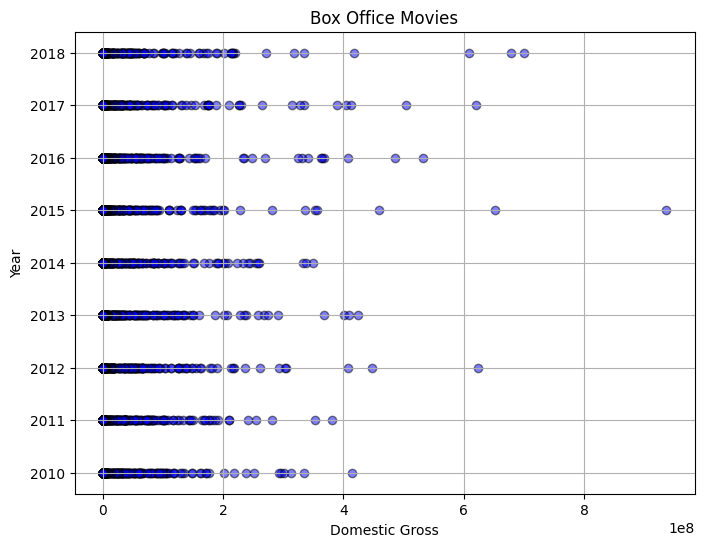

In [46]:



x = bom_movie_gross_data['domestic_gross']
y = bom_movie_gross_data['year']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot with scatter()
ax.scatter(x, y, alpha=0.5, color='blue', marker='o', edgecolors='black')

# Set x and y axes labels, legend, and title
ax.set_xlabel('Domestic Gross')
ax.set_ylabel('Year')
ax.set_title('Box Office Movies')

# Add gridlines
ax.grid(True)

# Show plot
plt.show()


# b)Cleaning movie budgets 

In [47]:
tn_movie_budgets_data.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [48]:
#since there are no missing gata we check for duplicates
#checking for duplicates in movie
def unique_column_duplicates(data, column):
    
    
    duplicated_count = data[column].duplicated().sum()
    
    if duplicated_count == 0:
        print(f"The column {column.title()} has no duplicates.")
    else:
        print(f"The column {column.title()} has {duplicated_count} duplicated rows.")


unique_column_duplicates(tn_movie_budgets_data, 'movie')


The column Movie has 84 duplicated rows.


In [49]:
#checking for duplicates in id column

def unique_column_duplicates(data, column):
    
    
    duplicated_count = data[column].duplicated().sum()
    
    if duplicated_count == 0:
        print(f"The column {column.title()} has no duplicates.")
    else:
        print(f"The column {column.title()} has {duplicated_count} duplicated rows.")


unique_column_duplicates(tn_movie_budgets_data, 'id')


The column Id has 5682 duplicated rows.


In [50]:
#  dropping duplicates from movie column
tn_movie_budgets_data.drop_duplicates(subset= "movie", keep="first", inplace=True)

In [51]:
tn_movie_budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   movie              5698 non-null   object
 3   production_budget  5698 non-null   object
 4   domestic_gross     5698 non-null   object
 5   worldwide_gross    5698 non-null   object
dtypes: int64(1), object(5)
memory usage: 311.6+ KB


# c)Cleaning movie basics


In [52]:
#first step of data cleaning
#checking for missing values
movie_basics_data.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    3
genres             0
dtype: int64

In [53]:
#dropping the rows
movie_basics_data['runtime_minutes'].dropna()


0    175.0
1    114.0
2    122.0
4     80.0
5     75.0
7     83.0
9     82.0
Name: runtime_minutes, dtype: float64

In [54]:
movie_basics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         10 non-null     object 
 1   primary_title    10 non-null     object 
 2   original_title   10 non-null     object 
 3   start_year       10 non-null     int64  
 4   runtime_minutes  7 non-null      float64
 5   genres           10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes


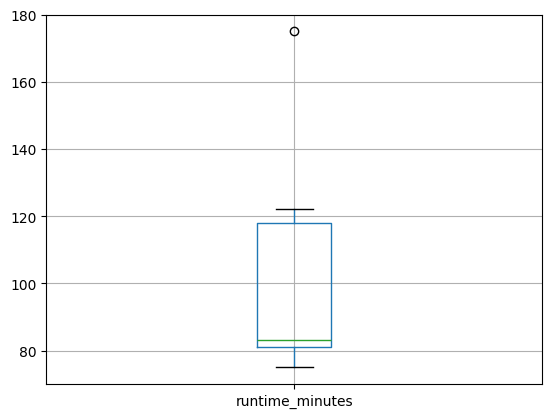

In [55]:
#checking for outliers in movie basics
data = movie_basics_data
data.boxplot(column ='runtime_minutes')
plt.show()

In [56]:
# dealing with outliers
Q1 = movie_basics_data['runtime_minutes'].quantile(0.25)
Q3 = movie_basics_data['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Filter out data points beyond the IQR range
data_no_outliers = movie_basics_data[(movie_basics_data['runtime_minutes'] >= Q1 - 1.5 * IQR)
                                     & (movie_basics_data['runtime_minutes'] <= Q3 + 1.5 * IQR)]


In [57]:
movie_basics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         10 non-null     object 
 1   primary_title    10 non-null     object 
 2   original_title   10 non-null     object 
 3   start_year       10 non-null     int64  
 4   runtime_minutes  7 non-null      float64
 5   genres           10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes


In [58]:
# Checking for duplicates
def unique_column_duplicates(data, column):
    
    # Check for duplicates in the specified column
    duplicated_count = data[column].duplicated().sum()
    
    if duplicated_count == 0:
        print(f"The column {column.title()} has no duplicates.")
    else:
        print(f"The column {column.title()} has {duplicated_count} duplicated rows.")


unique_column_duplicates(movie_basics_data, 'movie_id')


The column Movie_Id has no duplicates.


# d)Cleaning movie ratings

In [59]:
#first check for missing values

movie_ratings_data.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [60]:
unique_column_duplicates(movie_ratings_data, 'movie_id')

The column Movie_Id has no duplicates.


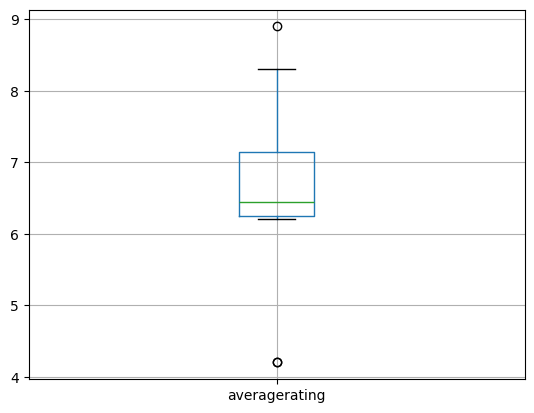

In [61]:
#checking for outliers in movie basics
data = movie_ratings_data
data.boxplot(column ='averagerating')
plt.show()

In [62]:
# dealing with outliers
Q1 = movie_ratings_data['averagerating'].quantile(0.25)
Q3 = movie_ratings_data['averagerating'].quantile(0.75)
IQR = Q3 - Q1

# Filter out data points beyond the IQR range
data_no_outliers = movie_ratings_data[(movie_ratings_data['averagerating'] >= Q1 - 1.5 * IQR)
                                     & (movie_ratings_data['averagerating'] <= Q3 + 1.5 * IQR)]

In [63]:
movie_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       10 non-null     object 
 1   averagerating  10 non-null     float64
 2   numvotes       10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


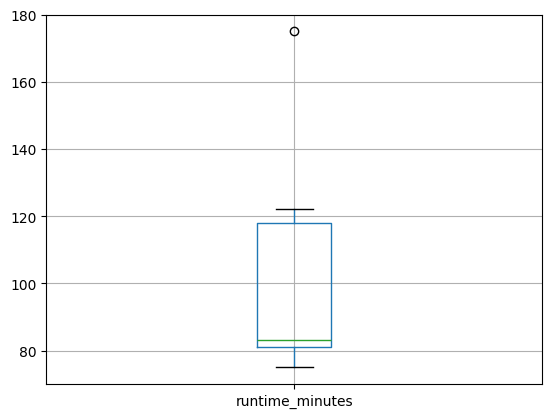

In [64]:
#checking for outliers in movie basics
data = movie_basics_data
data.boxplot(column ='runtime_minutes')
plt.show()


# Tidyng the dataset through merging
- We are going to merge certain datasets for easier analysis:-
* movie basics and movie ratings data

In [65]:

# merging movie basics with movie ratings
# Establish a connection to the SQLite database
conn = sqlite3.connect('data/im.db')

# Create a cursor object
cur = conn.cursor()

# SQL Query
query = """
    SELECT *
    FROM movie_basics
    FULL JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    LIMIT 10;
"""

# Execute query and fetch data
cur.execute(query)
movie_data = cur.fetchall()

# Get column names from the cursor description
columns = [desc[0] for desc in cur.description]

# Create a DataFrame using fetched data and columns
df = pd.DataFrame(movie_data, columns=columns)

# Display the DataFrame
print(df.head(10))
# Close the cursor and database connection when done
cur.close()
conn.close()


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
5  tt0111414                      A Thin Life                 A Thin Life   
6  tt0112502                          Bigfoot                     Bigfoot   
7  tt0137204                  Joe Finds Grace             Joe Finds Grace   
8  tt0139613                       O Silêncio                  O Silêncio   
9  tt0144449            Nema aviona za Zagreb       Nema aviona za Zagreb   

   start_year  runtime_minutes                      genres   movie_id  \
0        2013            175.0          Action,Crime,Drama  tt0063540   
1     

## 5. Data Analysis and Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***


In the context of exploring successful films at the box office, the focus was more on descriptive analysis rather than building predictive models. Here's an outline of the approach taken for analyzing the data:
The analysis focused on identifying attributes associated with box office success, aligning with the business problem of guiding Microsoft's movie studio in selecting film types.
### Analysis Approach:
1. **Exploratory Data Analysis (EDA):** Utilized statistical and visualization techniques to understand the distribution of variables, identify trends, and uncover patterns in successful movies.
   
2. **Feature Engineering:** Processed and transformed raw data, creating  combining existing movie basics and movie ratings to extract more meaningful insights. For instance, analyzing genres, ratings, and other movie attributes.

3. **Correlation and Patterns:** Investigated relations among variables to identify relationships that contribute to a movie's success at the box office.


- The insights derived from the analysis can serve as valuable guidance for Microsoft's movie studio in making informed decisions.
- Implementing strategies aligned with these insights could potentially increase the studio's chances of creating successful movies that reasonate with audiences.

In [66]:
#groupby the desired column
average_ratings = bom_movie_gross_data.groupby('domestic_gross')['domestic_gross'].mean()

highest_average_rating = average_ratings.max()
print(highest_average_rating)
for domestic_gross in bom_movie_gross_data:
    if domestic_gross == '936700000':
        print (bom_movie_gross_data['foreign_gross'])
        
else:
    print("none")


936700000.0
none


## a) Studio Performance with earnings:

Which genres have been the most successful at the box office in terms of earnings?
Are there specific genres that consistently outperform others?

In [67]:
#finding the top most performing studio
studio_earnings = bom_movie_gross_data.groupby('studio')['domestic_gross'].median().sort_values(ascending=False)
#select top 10 studios
TopStudios = studio_earnings.head(5)
#Now displaying them
print("The top performing studios;")
for studio,earnings in TopStudios.items():
    print(f'{studio}:{earnings:}')

The top performing studios;
P/DW:157250000.0
BV:92100000.0
Sony:63500000.0
WB (NL):63100000.0
Fox:62150000.0


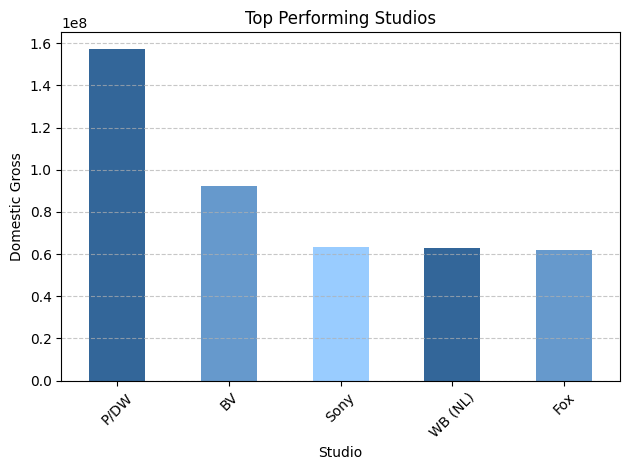

In [68]:


custom_color = ['#336699', '#6699CC', '#99CCFF']
 # Custom color for the bars

# TopStudios is your DataFrame containing studio and domestic gross information
TopStudios.plot(kind='bar', color=custom_color)
plt.title('Top Performing Studios')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adjusting layout 
plt.tight_layout()

# Show plot
plt.show()


# Evaluation of Top performing Studios
From the visualization above comparing each studio with the earnings we get to see that the top three performing studios are:-

*(P/DW)-Paramount Pictures/Dream Works

*(BV)-Buena Vista

*Sony

Microsoft can partner and collaborate with this top performing studios will enhance chances of producing movies with high revenues as we can capitalize on their existing success and market presence.

## b) Genre and rating:
Which genre is most viewed and how is it rated?

In [69]:



column_names = ['movie-id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes']

# Create a DataFrame with the correct number of columns
movie_data_df = pd.DataFrame(movie_data, columns=column_names)


In [70]:
#finding the top most performing genre
movie_genre = movie_data_df.groupby('genres')['averagerating'].median().sort_values(ascending=False)
#select top 10 genres
TopGenre = movie_genre.head(5)
#Now displayong them
print("The top performing genre;")
for genres,averagerating in TopGenre.items():
    print(f'{genres}:{averagerating:}')

The top performing genre;
Adventure,Animation,Comedy:8.1
Biography,Drama:7.2
Action,Crime,Drama:7.0
Drama:6.9
Comedy,Drama,Fantasy:6.5


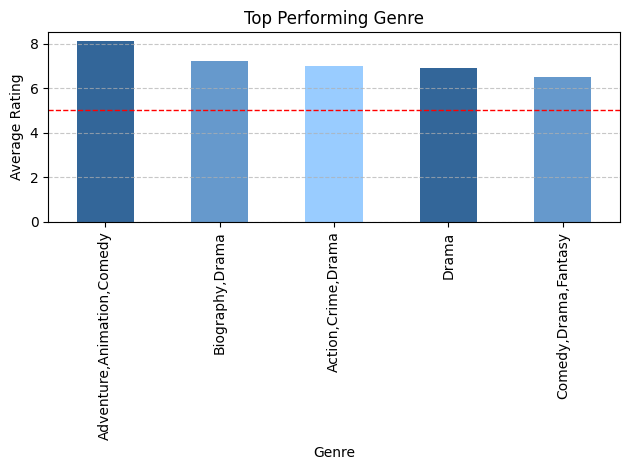

In [71]:

#custom colors
custom_color = ['#336699', '#6699CC', '#99CCFF']
  

TopGenre.plot(kind='bar', color=custom_color)
plt.title('Top Performing Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=90)

# Adding horizontal line at average rating 5 for reference 
plt.axhline(y=5, color='red', linestyle='--', linewidth=1)

# Adjusting layout 
plt.tight_layout()

# Show plot
plt.show()


# Evaluation of top performing genres
From the visualization above comparing each genre with the ratings we get to see that the top three performing studios are:-

*Adventure,Animation,Comedy

*Biography,Drama

*Action,Crime,Drama

Investing in this particular genres could prove profitable as they are highly rated by the audience.


## c) Budget vs. Revenue:

Is there a correlation between a movie's budget and its box office success?
Do higher budget films tend to earn more revenue?


In [72]:
# Remove dollar signs and commas, then convert to float
tn_movie_budgets_data['production_budget'] = tn_movie_budgets_data['production_budget'].replace('[$,]', '', regex=True).astype(float)
tn_movie_budgets_data['domestic_gross'] = tn_movie_budgets_data['domestic_gross'].replace('[$,]', '', regex=True).astype(float)

# Calculate the relationship between budget and domestic gross
Budget_and_revenue = tn_movie_budgets_data.groupby('production_budget')['domestic_gross'].median().sort_values(ascending=False)
BR = Budget_and_revenue.head(5)

# Displaying the relationship
print("The relationship between budget and domestic gross:")
for production_budget, domestic_gross in BR.items():
    print(f'{production_budget}: {domestic_gross}')



The relationship between budget and domestic gross:
306000000.0: 936662225.0
425000000.0: 760507625.0
317000000.0: 620181382.0
330600000.0: 459005868.0
79300000.0: 421785283.0


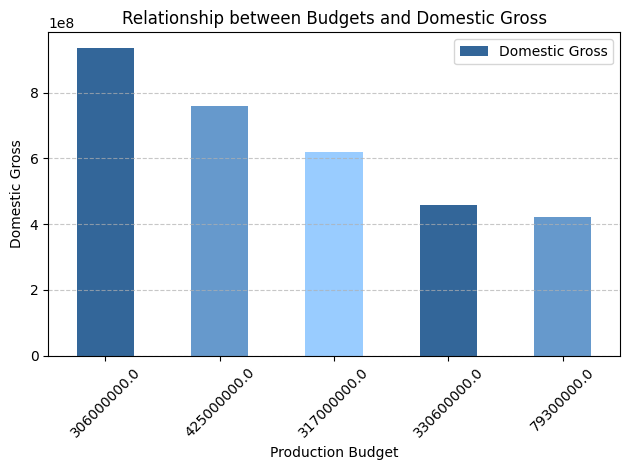

In [73]:


 # Custom color for the bars
custom_color = ['#336699', '#6699CC', '#99CCFF']


# Plotting the bar chart
BR.plot(kind='bar', color=custom_color)
plt.title('Relationship between Budgets and Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adding a legend 
plt.legend(['Domestic Gross'])

# Show plot
plt.tight_layout()  
plt.show()


# Evaluation of budget and revenue
From the visualization above comparing the production budget with the domestic gross we get to see that the higher the production budget the higher the domestic gross (revenue).This means that strategic investments ought to be made in movies inorder for it to result in profitable revenues .

## d) Budget and worldwide revenue:

Do highly rated movies tend to perform better at the box office in terms of revenue?
Is there a correlation between ratings and the domestic gross?

In [74]:
# Remove dollar signs and commas, then convert to float
tn_movie_budgets_data['production_budget'] = tn_movie_budgets_data['production_budget'].replace('[$,]', '', regex=True).astype(float)
tn_movie_budgets_data['worldwide_gross'] = tn_movie_budgets_data['worldwide_gross'].replace('[$,]', '', regex=True).astype(float)

# Calculating the relationship between budget and worldwide gross
Budget_and_revenueW = tn_movie_budgets_data.groupby('production_budget')['worldwide_gross'].median().sort_values(ascending=False)
BRW = Budget_and_revenueW.head(5)

# Displaying the relationship
print("The relationship between budget and worldwide gross:")
for production_budget, worldwide_gross in BRW.items():
    print(f'{production_budget}: {worldwide_gross}')



The relationship between budget and worldwide gross:
425000000.0: 2776345279.0
306000000.0: 2053311220.0
330600000.0: 1403013963.0
317000000.0: 1316721747.0
215000000.0: 1151534174.5


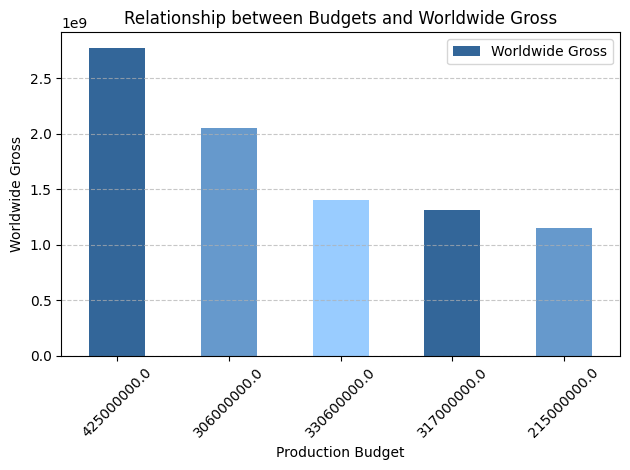

In [75]:


# Custom color for the bars
custom_color = ['#336699', '#6699CC', '#99CCFF']
 

# Plotting the bar chart
BRW.plot(kind='bar', color=custom_color)
plt.title('Relationship between Budgets and Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adding a legend 
plt.legend(['Worldwide Gross'])

# Show plot
plt.tight_layout()  
plt.show()


# Evaluation of budget and worldwide revenue
From the visualization above comparing the production budget with the worldwide gross we get to see that the higher the production budget the lower the worldwide gross (revenue).This means that strategic investments ought to be made in movies inorder for it to result in profitable revenues.

## 6. CONCLUSIONS
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In conclusion, the analysis offers valuable insights into current box office trends, potentially aiding the decision-making process for the new movie studio. However, it's essential to continuously validate and update these insights to ensure their ongoing relevance in an ever-evolving entertainment landscape.

## RECOMMENDATIONS
As a reult of my work I would recommend Microsoft to implement the following steps as they would aid in Microsoft successful venture into creation of video content:
## 1.Work with large studios
Microsoft should aim to partner or even collaborate with established and larger film studios such as Paramount pictures/Dream Works(P/DW),Buena Vista pictures(BV) and SONY as this enhances the chance of producing movies with high revenues.
## 2.Market Analysis
Microsoft should produce the genres that are most highly rated are Adventure,Animation,Comedy,Biography,Drama,Action,Crime,Drama and are likely to bring in good returns .Monitoring of industry trends and audience preferences and performance of other movie sites to make informed decisions and adapt to its strategies for sustained success as things change and the preferences evolve with time.
## 3.Strategic investments
From our analysis we have seen that the higher the production budget , the higher the worldwide gross which is the earnings from the video content therefore it is important for Microsoft to consider strategic investments in or acquisitions of larger studios or even content from them to capitalize on their existing success and market presence and to build a diverse and successful movie portfolio .

## LIMITATIONS
Some of the reasons my analysis might not fully solve the business problem are highlighted below:
## 1.Advanced Analytics
 Employment of predictive modeling to forecast future trends and potential success factors in the movie industry could prove to be more resourceful ,detailed and even more accurate in terms of the output derived from its analysis
## 2.Temporal Context
Trends in the entertainment industry evolve rapidly. The analysis might reflect current preferences but could become outdated as audience tastes change.
## 3.Complex Factors
 Success in the movie industry involves multifaceted factors beyond data analysis, including marketing, timing, and creative aspects, which this analysis might not fully capture.
 
## NEXT STEPS
According to the analysis here are some ways to forge forward and even improve on the analysis that has been
done.In future to improve on this project ,some next steps that can be taken include:
## 1.Predictive modelling
Incorporating advanced analytics such as AI to forecast future trends and success in the film industry to be well informed and prepared for future uncertainities. 
## 2.Collaborate with other movie studios
From our analysis we could see that other studios perform better than others.Collaborating with this studios will enhance chances of producing movies with high revenues as we can capitalize on their existing success and market presence. 
## 3.Continuous analysis of the market and industry trends
Continuously monitor industry trends and audience preferences to adapt strategies for creating movies that reasonate with viewers which could give a competitive edge in the diverse and fast changing industry.
-By leveraging these insights and considering the limitations, the business could benefit from informed decision-making regarding film creation. However, continuous monitoring of industry shifts and a multidimensional approach beyond data analysis are crucial for sustained success in the dynamic movie industry.